<a href="https://colab.research.google.com/github/nehagosula/Healthstatz/blob/main/Health_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Health and Well being project

## Importing the libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler



## Importing the dataset

In [ ]:
df = pd.read_csv('data.csv')


In [ ]:
X = df[['age', 'BMI', 'blood_pressure', 'smoking_status', 'exercise_frequency']]
y = df['diabetes']

In [ ]:
print(X)

    age   BMI  blood_pressure  smoking_status  exercise_frequency
0    25  22.5             120               0                   3
1    30  28.0             130               1                   1
2    45  31.0             140               1                   0
3    50  26.5             150               1                   2
4    35  24.0             135               0                   3
5    60  32.0             160               1                   0
6    70  29.5             145               1                   1
7    40  26.8             125               0                   2
8    55  34.0             155               0                   3
9    65  30.0             165               1                   0
10   28  23.0             118               0                   4
11   42  29.5             142               1                   1
12   38  26.8             138               0                   3
13   52  34.0             158               1                   0
14   46  2

In [ ]:
print(y)

0     0
1     1
2     1
3     0
4     1
5     1
6     0
7     1
8     1
9     0
10    1
11    0
12    0
13    1
14    0
15    1
16    1
17    1
18    1
19    0
20    1
21    1
22    0
23    1
24    0
25    1
26    1
27    0
28    0
Name: diabetes, dtype: int64


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [ ]:
print(X_train)
print(X_test)

    age   BMI  blood_pressure  smoking_status  exercise_frequency
21   72  29.8             137               1                   0
0    25  22.5             120               0                   3
26   66  27.0             154               1                   1
13   52  34.0             158               1                   0
15   39  31.5             147               0                   2
11   42  29.5             142               1                   1
17   55  29.8             155               1                   0
1    30  28.0             130               1                   1
4    35  24.0             135               0                   3
5    60  32.0             160               1                   0
2    45  31.0             140               1                   0
24   37  30.0             122               0                   2
3    50  26.5             150               1                   2
23   44  29.0             162               1                   1
25   58  3

## Evaluating model

In [ ]:
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f'ROC AUC Score: {roc_auc}')

              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.40      1.00      0.57         2

    accuracy                           0.50         6
   macro avg       0.70      0.62      0.49         6
weighted avg       0.80      0.50      0.46         6

ROC AUC Score: 0.5


## Plotting graph

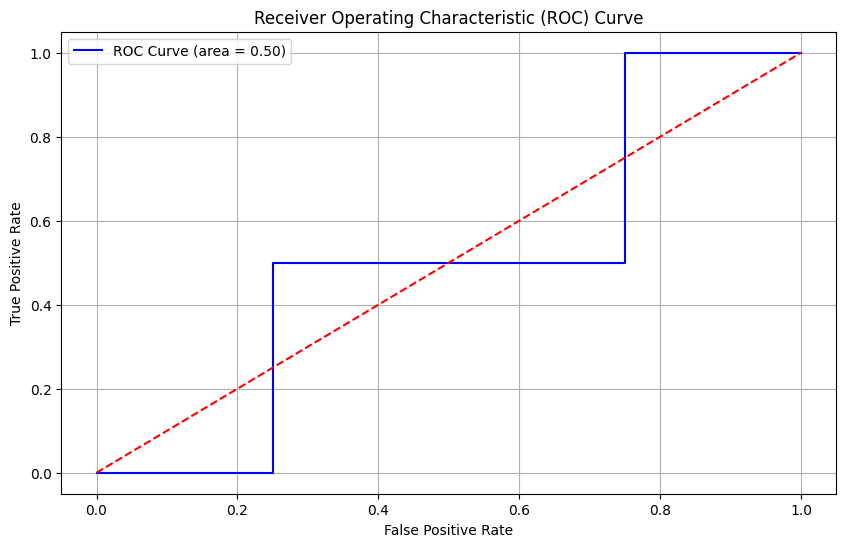

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

## predicting the risk

In [ ]:
def predict_diabetes(age, bmi, blood_pressure, smoking_status, exercise_frequency):
    input_data = pd.DataFrame({
        'age': [age],
        'BMI': [bmi],
        'blood_pressure': [blood_pressure],
        'smoking_status': [smoking_status],
        'exercise_frequency': [exercise_frequency]
    })

    prediction = model.predict(input_data)[0]
    probability = model.predict_proba(input_data)[:, 1][0]

    if prediction == 1:
        result = "At risk of developing diabetes."
    else:
        result = "Low risk of developing diabetes."

    return result, probability

In [ ]:
def get_user_input():
    print("Please enter the following information:")
    age = int(input("Age: "))
    bmi = float(input("BMI: "))
    blood_pressure = int(input("Blood Pressure: "))
    smoking_status = int(input("Smoking Status (0 for non-smoker, 1 for smoker): "))
    exercise_frequency = int(input("Exercise Frequency (times per week): "))

    return age, bmi, blood_pressure, smoking_status, exercise_frequency

In [ ]:
user_data = get_user_input()
result, probability = predict_diabetes(*user_data)
print(f"Prediction: {result} (Probability: {probability:.2f})")

Please enter the following information:
Age: 18
BMI: 27.6
Blood Pressure: 128
Smoking Status (0 for non-smoker, 1 for smoker): 0
Exercise Frequency (times per week): 3
Prediction: Low risk of developing diabetes. (Probability: 0.48)
